In [63]:
import pandas as pd
from pylab import *
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

import seaborn as sns

%matplotlib inline

## Prepare data

In [2]:
df = pd.read_csv("data/iris.csv")

In [33]:
features = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
pred = df["class"].map({"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2})

X = features.values
y = pred.values

In [34]:
log_reg = LogisticRegression()

In [35]:
log_reg.fit(X, y)
y_pred = log_reg.predict(X)

In [6]:
metrics.accuracy_score(y, y_pred)

0.95999999999999996

## Train/Split approach

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [9]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.97777777777777775

## Cross validation approach to choose best algorithm or parameter

In [52]:
kf = KFold(25, n_folds=10)

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10,scoring="accuracy")
scores

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

In [53]:
scores.mean()

0.96666666666666679

In [62]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
    
print(k_scores)

[0.95999999999999996, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.96666666666666656, 0.96666666666666656, 0.95999999999999996, 0.97333333333333338, 0.97333333333333338, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.95333333333333337, 0.94666666666666666]


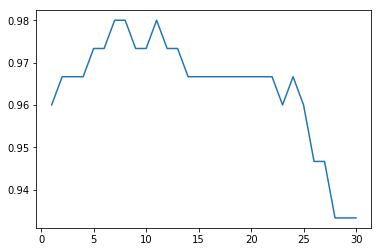

In [61]:
plot(k_range, k_scores);

## Grid search CV approach

In [85]:
k_range = range(1, 31)
param_grid = dict(n_neighbors=list(k_range))
grid = GridSearchCV(knn, param_grid, cv = 10, scoring="accuracy")
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13}


## Visualization

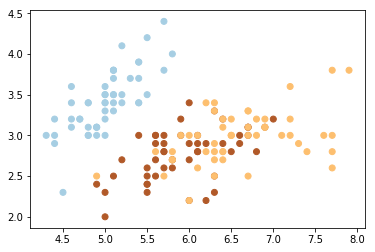

In [41]:
# scatter(features["sepal_length"], features["sepal_width"])
# plt.plot(features["sepal_length"], y_pred)
# features
# sns.pairplot(features, x_vars="sepal_length", y_vars="sepal_width", size=5, kind="reg");
scatter(features["sepal_length"], features["sepal_width"], c=y, cmap=plt.cm.Paired);

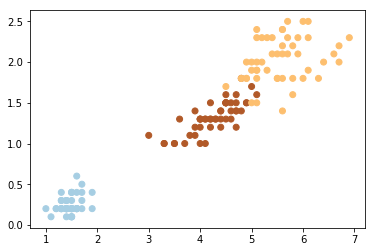

In [42]:
scatter(features["petal_length"], features["petal_width"], c=y, cmap=plt.cm.Paired);

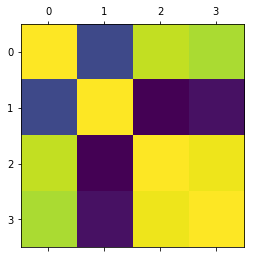

In [86]:
matshow(df.corr());